In [ ]:
# https://github.com/jukyellow/algoTrade/blob/master/ch06/6.3%20Kmeans%20yahoo_data_T.ipynb

In [1]:
import pandas as pd
import pandas_datareader as dr
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Wikipeda에서 S&P500에 포함된 회사들의 리스트를 가져온다
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500_url)
tickers = data_table[0]['Symbol'].tolist()  #TICKER명만 리스트로 만든다.
security = data_table[0]['Security'].tolist() #Ticker명에 해당하는 회사 전체 이름을 리스트로 가져온다 (이해를 돕기 위한 작업이므로 건너뛰어도 무방하다)
sector = data_table[0]['GICS Sector'].tolist()

tickers = tickers[0:60] #이해를 돕기위해 적은 양의 데이터만 사용하도록 하겠다.
security = security[0:60]
sector = sector[0:60]

prices_list = []

print(tickers[0:5])
print(security[0:5])
print(sector[0:5])

#리스트 길이가 같은지 확인한다. equal 함수를 사용해도 되지만, 데이터가 복잡하지 않기 때문에 가장 간단한 방법을 사용했다.
print(len(tickers))
print(len(security))
print(len(sector))

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN']
['3M Company', 'Abbott Laboratories', 'AbbVie Inc.', 'ABIOMED Inc', 'Accenture plc']
['Industrials', 'Health Care', 'Health Care', 'Health Care', 'Information Technology']
60
60
60


In [3]:
#데이터 불러오기. 2017년1월1일 부터 2020년 2월 28일까지의 데이터를 가져온다.
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)

prices_df.sort_index(inplace=True)

prices_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,AOS,APA,AAPL,AMAT,APTV,ADM,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB,AVY,BKR
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,158.059586,36.148453,51.374924,112.360001,108.617332,35.706703,103.480003,11.43,168.394165,9.972317,31.761858,44.900917,130.245636,67.570000,82.679207,82.750580,98.723282,122.629997,96.959999,62.129780,33.330734,68.625214,808.010010,786.140015,53.095062,753.669983,8.736124,46.824547,44.741226,54.834415,70.524620,58.091866,98.174133,66.832031,100.940514,76.909164,47.900253,134.517654,64.869019,66.756104,93.349998,136.147202,107.092255,44.366776,57.933792,27.459938,30.180813,54.869354,40.365726,97.059998,47.930851,86.198578,33.468929,68.299728,76.180000,94.856934,791.460022,154.071945,64.911896,40.114212
2017-01-04,158.299225,36.435421,52.099331,115.739998,108.878471,36.408356,104.139999,11.43,169.776047,9.886791,32.053204,45.490070,131.380997,68.330002,83.787857,85.241043,101.223053,127.110001,97.769997,63.310913,33.532856,68.810257,807.770020,786.900024,53.267773,757.179993,8.736124,46.878181,45.127758,54.913052,71.680756,58.850128,98.349861,67.350037,103.963776,78.817696,48.474434,136.427490,65.350006,66.618004,94.440002,135.966614,108.267517,44.759068,57.761215,27.429203,30.464298,56.900352,40.295818,101.730003,48.536404,87.086922,33.274429,68.684532,77.519997,95.003586,793.039978,154.708755,66.762833,39.941498
2017-01-05,157.757690,36.750153,52.494453,114.809998,107.246315,36.973591,105.910004,11.24,169.657593,9.758502,31.843801,44.949219,130.082138,69.550003,82.453705,84.949715,100.857018,139.179993,94.820000,63.656597,33.488907,68.495667,813.020020,794.020020,53.330589,780.450012,8.736124,47.110611,44.345032,55.210117,70.797203,58.520054,98.007668,67.461029,102.646172,77.905327,47.861328,136.525650,65.003685,65.660538,94.709999,137.411346,108.429947,44.553589,57.452377,27.568691,30.332001,56.551025,39.998684,101.940002,48.646500,87.123550,33.181072,68.345535,76.930000,94.435333,792.000000,155.650894,66.105736,39.694752
2017-01-06,158.219330,37.749912,52.510921,115.419998,108.468102,36.944351,108.300003,11.32,167.436676,10.109159,31.953058,46.349663,131.117554,69.790001,81.720879,85.344421,100.178505,143.610001,94.080002,63.272511,33.216496,68.606712,825.210022,806.150024,53.566105,795.989990,8.736124,47.468178,44.654255,55.166431,70.938194,59.599453,97.360268,67.377785,104.378906,78.948051,48.727455,139.916946,65.494331,65.918312,93.949997,137.202255,109.261230,44.572277,57.334286,27.876030,30.275309,56.193558,39.081089,101.279999,48.756603,87.902039,32.519962,67.951599,79.300003,94.499512,792.909973,157.020416,67.003456,39.454178
2017-01-09,157.367111,37.712887,52.856659,117.110001,107.255646,36.739704,108.570000,11.49,167.338013,9.861135,31.648048,46.494530,132.888702,70.000000,82.181244,85.034279,99.142899,144.770004,94.790001,62.821156,32.759556,67.625946,827.179993,806.650024,53.346279,796.919983,8.736124,46.475903,45.494972,54.441254,71.304787,59.215866,97.129051,65.999519,103.963776,79.581116,48.299255,141.755325,64.820908,66.231346,94.290001,135.719467,108.353493,44.273380,56.643955,28.131361,30.974546,55.291801,39.107304,99.519997,48.077644,86.189407,32.110714,67.072067,79.589996,93.912949,790.340027,154.595322,67.151520,39.010044


In [4]:
# 수익률 변화의 정도를 계산하고, 전치를 사용해 ticker명을 Index로 사용한다.
df = prices_df.pct_change().iloc[1:].T
df.head()

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-06,2017-02-07,2017-02-08,2017-02-09,2017-02-10,2017-02-13,2017-02-14,2017-02-15,2017-02-16,2017-02-17,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-27,2017-02-28,2017-03-01,2017-03-02,...,2020-12-11,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-08,2021-02-09
MMM,0.001516,-0.003421,0.002926,-0.005386,-0.003892,0.007418,-0.002529,-0.000282,-0.000733,0.006939,0.001064,-0.001063,0.000112,-0.014229,0.004319,0.000509,0.003733,-0.011607,-0.003420,0.002002,-0.005651,0.004937,0.000343,0.003769,0.007453,0.006269,0.004602,0.011285,0.003204,0.007067,0.009411,-0.002508,0.002296,0.014561,0.006182,0.001175,-0.002668,-0.002996,0.018835,0.000158,...,0.003055,-0.005402,0.009244,0.004179,0.007069,-0.001302,-0.004308,-0.005010,-0.004520,0.003046,0.001089,-0.004922,0.001496,0.003906,-0.016706,-0.001687,0.015212,-0.025662,-0.018265,-0.008522,0.007930,-0.001381,0.000782,-0.005168,0.021564,0.006504,0.002644,-0.009551,0.007986,0.032631,0.060813,-0.017305,-0.042307,-0.005465,0.001832,0.002628,0.009232,0.010785,0.009776,0.000996
ABT,0.007939,0.008638,0.027204,-0.000981,0.013500,0.001341,-0.008763,0.005157,-0.000733,-0.003423,-0.008832,0.001485,-0.002966,-0.000744,0.000000,0.016125,0.000977,0.000244,0.018532,0.013407,0.009922,0.000701,-0.008181,0.010842,-0.011425,0.003302,0.004702,0.011231,0.009949,0.008018,0.004546,0.011086,0.007160,0.000000,0.008665,0.006167,-0.004816,-0.008359,0.011313,0.002194,...,0.004694,-0.002149,0.006180,-0.001024,0.013415,0.001747,-0.008076,0.001758,-0.007665,0.008376,-0.005168,0.005010,0.001015,0.009683,-0.003471,0.012373,-0.002082,0.009707,0.002785,-0.006899,-0.018044,0.030412,-0.014861,0.011450,0.011411,0.002843,0.000531,-0.000974,0.016661,0.000087,-0.003835,0.053373,0.026580,-0.008496,-0.018769,-0.000166,-0.003993,0.035828,0.003789,0.005221
ABBV,0.014100,0.007584,0.000314,0.006584,-0.002180,-0.036103,0.002290,0.011586,-0.002097,-0.003233,-0.004541,-0.003747,-0.003107,-0.006234,0.013206,-0.001792,-0.020728,0.007167,0.011253,-0.003600,0.000000,-0.003613,-0.000330,-0.001484,-0.000660,0.005288,-0.006903,0.001490,0.005123,0.013647,-0.002758,0.004717,0.000971,-0.007602,0.009452,0.002422,0.002094,-0.006107,0.016009,0.006685,...,-0.010699,-0.020124,-0.013244,0.017701,0.002389,-0.004195,-0.007085,-0.008774,0.004669,-0.000194,0.001840,0.012083,0.005444,0.017859,-0.016239,0.010341,-0.008638,0.010703,0.005248,0.016314,0.006971,0.024321,0.004318,-0.009944,0.015020,0.003922,-0.012076,-0.003595,-0.003247,-0.015385,-0.055239,0.013815,-0.016601,-0.001756,0.011437,0.033633,0.014773,0.001843,-0.017383,-0.013478
ABMD,0.030082,-0.008035,0.005313,0.014642,-0.041585,-0.008642,0.009886,0.029367,-0.014265,-0.006578,-0.009358,-0.003297,-0.002414,0.006543,0.022440,-0.076032,0.026016,-0.024805,0.002073,-0.007333,-0.014111,0.008261,0.052782,-0.005068,-0.011006,-0.002575,0.001752,-0.011598,0.014714,0.015235,0.032815,0.020306,0.010637,-0.006875,-0.000940,0.002139,0.006829,0.000254,0.028143,-0.010223,...,-0.035382,0.035481,0.028922,-0.004430,0.028635,0.040427,0.008248,0.022041,0.005689,-0.002105,0.031311,0.025630,0.009317,0.000864,-0.023041,0.018533,-0.003069,0.006063,0.001545,0.001635,0.000247,-0.002957,-0.016682,0.035751,0.020049,0.034404,0.001984,-0.001894,0.001207,-0.021331,-0.036053,0.080736,-0.019373,-0.018349,0.017493,-0.062126,-0.004445,0.009453,-0.006070,-0.004235
ACN,0.002404,-0.014991,0.011392,-0.011178,0.000522,0.009213,-0.002

In [5]:
test1 = df.index.to_list()
print(test1 == tickers)

True


In [6]:
test2 = []
for i in tickers:
    if i not in test1:
        test2.append(i)
print(test2)

# 만약에 test2에 종목이 나오면 해당 종목을 제거한다.
# tickers.remove('BRK.B')
# tickers.remove('BF.B')
# security.remove('Berkshire Hathaway')
# security.remove('Brown-Forman Corp.')

[]


In [7]:
#회사명 리스트와 값의 리스트를 저장한다.
companies = list(df.index)
companies
movements = df.values
movements

array([[ 0.00151613, -0.00342095,  0.00292626, ...,  0.0107848 ,
         0.00977599,  0.00099584],
       [ 0.0079386 ,  0.00863807,  0.02720423, ...,  0.03582763,
         0.00378942,  0.0052209 ],
       [ 0.0141004 ,  0.00758402,  0.00031371, ...,  0.00184285,
        -0.01738257, -0.01347805],
       ...,
       [ 0.0041332 ,  0.00608976,  0.00879868, ...,  0.00215301,
         0.00644525,  0.00288467],
       [ 0.0285146 , -0.00984226,  0.01358007, ...,  0.01961594,
         0.01039923, -0.01343705],
       [-0.00430556, -0.00617769, -0.0060606 , ..., -0.01252237,
         0.02968035, -0.0124168 ]])

In [8]:
normalize = Normalizer()
array_norm = normalize.fit_transform(df)
df_norm = pd.DataFrame(array_norm, columns=df.columns)
final_df = df_norm.set_index(df.index)
final_df.head(10)

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-06,2017-02-07,2017-02-08,2017-02-09,2017-02-10,2017-02-13,2017-02-14,2017-02-15,2017-02-16,2017-02-17,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-27,2017-02-28,2017-03-01,2017-03-02,...,2020-12-11,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-08,2021-02-09
MMM,0.002842,-0.006413,0.005486,-0.010097,-0.007296,0.013907,-0.004742,-0.000528,-0.001374,0.013008,0.001995,-0.001993,0.000210,-0.026674,0.008096,0.000954,0.006997,-0.021759,-0.006412,0.003753,-0.010594,0.009255,0.000643,0.007066,0.013972,0.011751,0.008627,0.021155,0.006006,0.013247,0.017642,-0.004702,0.004304,0.027296,0.011588,0.002203,-0.005001,-0.005617,0.035309,0.000296,...,0.005727,-0.010126,0.017329,0.007834,0.013252,-0.002441,-0.008076,-0.009391,-0.008473,0.005710,0.002041,-0.009228,0.002804,0.007321,-0.031317,-0.003163,0.028516,-0.048106,-0.034241,-0.015976,0.014865,-0.002589,0.001466,-0.009688,0.040425,0.012193,0.004956,-0.017904,0.014971,0.061171,0.114001,-0.032440,-0.079310,-0.010245,0.003434,0.004927,0.017306,0.020217,0.018326,0.001867
ABT,0.015227,0.016569,0.052181,-0.001881,0.025895,0.002572,-0.016809,0.009892,-0.001406,-0.006565,-0.016941,0.002848,-0.005689,-0.001427,0.000000,0.030930,0.001873,0.000468,0.035547,0.025716,0.019032,0.001346,-0.015693,0.020796,-0.021914,0.006333,0.009018,0.021542,0.019084,0.015380,0.008719,0.021264,0.013734,0.000000,0.016621,0.011830,-0.009238,-0.016033,0.021699,0.004208,...,0.009004,-0.004122,0.011855,-0.001964,0.025732,0.003350,-0.015490,0.003372,-0.014703,0.016066,-0.009914,0.009609,0.001948,0.018573,-0.006657,0.023733,-0.003994,0.018619,0.005342,-0.013233,-0.034611,0.058333,-0.028506,0.021963,0.021887,0.005453,0.001019,-0.001868,0.031957,0.000167,-0.007356,0.102376,0.050984,-0.016296,-0.036002,-0.000319,-0.007659,0.068722,0.007269,0.010014
ABBV,0.023570,0.012678,0.000524,0.011006,-0.003645,-0.060350,0.003828,0.019368,-0.003506,-0.005405,-0.007591,-0.006264,-0.005194,-0.010420,0.022075,-0.002996,-0.034649,0.011980,0.018810,-0.006018,0.000000,-0.006039,-0.000551,-0.002481,-0.001104,0.008839,-0.011540,0.002490,0.008564,0.022812,-0.004609,0.007885,0.001624,-0.012707,0.015801,0.004048,0.003500,-0.010209,0.026761,0.011174,...,-0.017884,-0.033640,-0.022138,0.029589,0.003994,-0.007012,-0.011843,-0.014667,0.007805,-0.000324,0.003076,0.020198,0.009100,0.029853,-0.027145,0.017286,-0.014440,0.017891,0.008772,0.027271,0.011653,0.040656,0.007219,-0.016622,0.025108,0.006557,-0.020186,-0.006010,-0.005428,-0.025717,-0.092338,0.023093,-0.027751,-0.002936,0.019118,0.056221,0.024695,0.003081,-0.029057,-0.022530
ABMD,0.034402,-0.009189,0.006076,0.016745,-0.047557,-0.009883,0.011306,0.033585,-0.016313,-0.007522,-0.010702,-0.003771,-0.002761,0.007483,0.025662,-0.086951,0.029752,-0.028367,0.002370,-0.008386,-0.016138,0.009448,0.060362,-0.005796,-0.012587,-0.002945,0.002004,-0.013264,0.016827,0.017423,0.037527,0.023222,0.012165,-0.007863,-0.001075,0.002446,0.007810,0.000291,0.032184,-0.011692,...,-0.040463,0.040576,0.033075,-0.005067,0.032747,0.046233,0.009433,0.025206,0.006506,-0.002407,0.035807,0.029311,0.010655,0.000989,-0.026350,0.021195,-0.003510,0.006934,0.001767,0.001870,0.000282,-0.003382,-0.019077,0.040885,0.022928,0.039344,0.002268,-0.002165,0.001381,-0.024394,-0.041230,0.092331,-0.022155,-0.020984,0.020005,-0.071048,-0.005083,0.010810,-0.006942,-0.004843
ACN,0.004549,-0.028367,0.021558,-0.021152,0.000987,0.017433,-0.005

In [9]:
#누락된 데이터가 없는지 확인한다.
col_mask = df.isnull().any(axis=0)
row_mask = df.isnull().any(axis=1)
df.loc[row_mask, col_mask]

Date


In [10]:
final_df.shape

(60, 1032)

In [11]:
# 본격적인 클러스터링

num_of_clusters = range(2,12)
error = []
for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(final_df)
    error.append(clusters.inertia_/100)    
table=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})

print(table)

   Cluster_Numbers  Error_Term
0                2    0.309602
1                3    0.282183
2                4    0.273293
3                5    0.263180
4                6    0.252217
5                7    0.246949
6                8    0.237964
7                9    0.226051
8               10    0.219619
9               11    0.213411


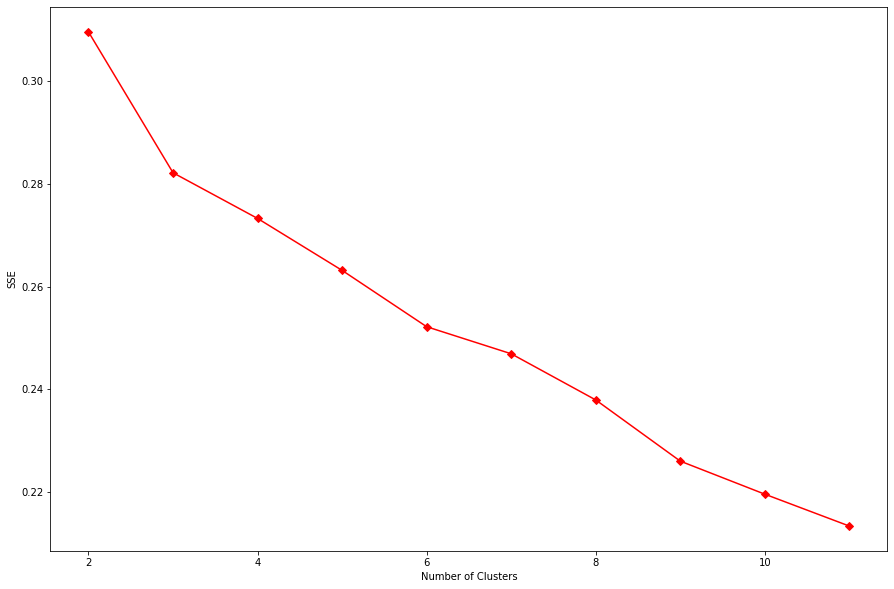

In [12]:
# 엘보우 방법으로 최적의 클러스터링 갯수를 찾아보자
from sklearn import metrics

plt.figure(figsize=(15,10))
plt.plot(table.Cluster_Numbers, table.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [13]:
clusters = KMeans(7)
clusters.fit(final_df)
clusters.labels_

array([1, 1, 1, 0, 1, 0, 0, 0, 4, 3, 3, 1, 1, 0, 5, 1, 2, 6, 1, 1, 2, 1,
       0, 0, 1, 0, 3, 2, 5, 2, 3, 3, 2, 2, 1, 1, 1, 6, 1, 1, 0, 1, 1, 1,
       3, 0, 1, 3, 1, 0, 1, 3, 1, 2, 0, 1, 4, 2, 1, 3], dtype=int32)

In [16]:
labels = clusters.predict(movements)
print(labels)

print('labels : ',len(labels))
print('companies : ',len(companies))
print('security : ',len(security))
print('sector : ',len(sector))

[1 1 1 0 1 0 0 0 4 3 3 1 1 0 5 1 1 6 1 1 2 1 0 0 1 0 3 2 5 2 3 3 2 2 1 1 1
 6 1 1 0 1 1 1 3 0 1 3 1 0 1 3 1 2 0 1 4 2 1 3]
labels :  60
companies :  60
security :  60
sector :  60


In [17]:
clustered_result = pd.DataFrame({'labels': labels, 'tickers': companies, 'full-name':security, 'sector':sector})
clustered_result.sort_values('labels')

,labels,tickers,full-name,sector
22,0,GOOGL,Alphabet Inc. (Class A),Communication Services
40,0,ANSS,"ANSYS, Inc.",Information Technology
3,0,ABMD,ABIOMED Inc,Health Care
25,0,AMZN,Amazon.com Inc.,Consumer Discretionary
5,0,ATVI,Activision Blizzard,Communication Services
6,0,ADBE,Adobe Inc.,Information Technology
7,0,AMD,Advanced Micro Devices Inc,Information Technology
49,0,ANET,Arista Networks,Information Technology
54,0,ADSK,Autodesk Inc.,Information Technology
23,0,GOOG,Alphabet Inc. (Class C),Communication Services


In [18]:
final_df['Cluster'] = clusters.labels_
final_df.head()

Date,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00,2017-01-20 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,2017-01-25 00:00:00,2017-01-26 00:00:00,2017-01-27 00:00:00,2017-01-30 00:00:00,2017-01-31 00:00:00,2017-02-01 00:00:00,2017-02-02 00:00:00,2017-02-03 00:00:00,2017-02-06 00:00:00,2017-02-07 00:00:00,2017-02-08 00:00:00,2017-02-09 00:00:00,2017-02-10 00:00:00,2017-02-13 00:00:00,2017-02-14 00:00:00,2017-02-15 00:00:00,2017-02-16 00:00:00,2017-02-17 00:00:00,2017-02-21 00:00:00,2017-02-22 00:00:00,2017-02-23 00:00:00,2017-02-24 00:00:00,2017-02-27 00:00:00,2017-02-28 00:00:00,2017-03-01 00:00:00,2017-03-02 00:00:00,...,2020-12-14 00:00:00,2020-12-15 00:00:00,2020-12-16 00:00:00,2020-12-17 00:00:00,2020-12-18 00:00:00,2020-12-21 00:00:00,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,2021-01-14 00:00:00,2021-01-15 00:00:00,2021-01-19 00:00:00,2021-01-20 00:00:00,2021-01-21 00:00:00,2021-01-22 00:00:00,2021-01-25 00:00:00,2021-01-26 00:00:00,2021-01-27 00:00:00,2021-01-28 00:00:00,2021-01-29 00:00:00,2021-02-01 00:00:00,2021-02-02 00:00:00,2021-02-03 00:00:00,2021-02-04 00:00:00,2021-02-05 00:00:00,2021-02-08 00:00:00,2021-02-09 00:00:00,Cluster
MMM,0.002842,-0.006413,0.005486,-0.010097,-0.007296,0.013907,-0.004742,-0.000528,-0.001374,0.013008,0.001995,-0.001993,0.000210,-0.026674,0.008096,0.000954,0.006997,-0.021759,-0.006412,0.003753,-0.010594,0.009255,0.000643,0.007066,0.013972,0.011751,0.008627,0.021155,0.006006,0.013247,0.017642,-0.004702,0.004304,0.027296,0.011588,0.002203,-0.005001,-0.005617,0.035309,0.000296,...,-0.010126,0.017329,0.007834,0.013252,-0.002441,-0.008076,-0.009391,-0.008473,0.005710,0.002041,-0.009228,0.002804,0.007321,-0.031317,-0.003163,0.028516,-0.048106,-0.034241,-0.015976,0.014865,-0.002589,0.001466,-0.009688,0.040425,0.012193,0.004956,-0.017904,0.014971,0.061171,0.114001,-0.032440,-0.079310,-0.010245,0.003434,0.004927,0.017306,0.020217,0.018326,0.001867,1
ABT,0.015227,0.016569,0.052181,-0.001881,0.025895,0.002572,-0.016809,0.009892,-0.001406,-0.006565,-0.016941,0.002848,-0.005689,-0.001427,0.000000,0.030930,0.001873,0.000468,0.035547,0.025716,0.019032,0.001346,-0.015693,0.020796,-0.021914,0.006333,0.009018,0.021542,0.019084,0.015380,0.008719,0.021264,0.013734,0.000000,0.016621,0.011830,-0.009238,-0.016033,0.021699,0.004208,...,-0.004122,0.011855,-0.001964,0.025732,0.003350,-0.015490,0.003372,-0.014703,0.016066,-0.009914,0.009609,0.001948,0.018573,-0.006657,0.023733,-0.003994,0.018619,0.005342,-0.013233,-0.034611,0.058333,-0.028506,0.021963,0.021887,0.005453,0.001019,-0.001868,0.031957,0.000167,-0.007356,0.102376,0.050984,-0.016296,-0.036002,-0.000319,-0.007659,0.068722,0.007269,0.010014,1
ABBV,0.023570,0.012678,0.000524,0.011006,-0.003645,-0.060350,0.003828,0.019368,-0.003506,-0.005405,-0.007591,-0.006264,-0.005194,-0.010420,0.022075,-0.002996,-0.034649,0.011980,0.018810,-0.006018,0.000000,-0.006039,-0.000551,-0.002481,-0.001104,0.008839,-0.011540,0.002490,0.008564,0.022812,-0.004609,0.007885,0.001624,-0.012707,0.015801,0.004048,0.003500,-0.010209,0.026761,0.011174,...,-0.033640,-0.022138,0.029589,0.003994,-0.007012,-0.011843,-0.014667,0.007805,-0.000324,0.003076,0.020198,0.009100,0.029853,-0.027145,0.017286,-0.014440,0.017891,0.008772,0.027271,0.011653,0.040656,0.007219,-0.016622,0.025108,0.006557,-0.020186,-0.006010,-0.005428,-0.025717,-0.092338,0.023093,-0.027751,-0.002936,0.019118,0.056221,0.024695,0.003081,-0.029057,-0.022530,1
ABMD,0.034402,-0.009189,0.006076,0.016745,-0.047557,-0.009883,0.011306,0.033585,-0.016313,-0.007522,-0.010702,-0.003771,-0.002761,0.007483,0.025

In [19]:
final_df.tail()

Date,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00,2017-01-20 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,2017-01-25 00:00:00,2017-01-26 00:00:00,2017-01-27 00:00:00,2017-01-30 00:00:00,2017-01-31 00:00:00,2017-02-01 00:00:00,2017-02-02 00:00:00,2017-02-03 00:00:00,2017-02-06 00:00:00,2017-02-07 00:00:00,2017-02-08 00:00:00,2017-02-09 00:00:00,2017-02-10 00:00:00,2017-02-13 00:00:00,2017-02-14 00:00:00,2017-02-15 00:00:00,2017-02-16 00:00:00,2017-02-17 00:00:00,2017-02-21 00:00:00,2017-02-22 00:00:00,2017-02-23 00:00:00,2017-02-24 00:00:00,2017-02-27 00:00:00,2017-02-28 00:00:00,2017-03-01 00:00:00,2017-03-02 00:00:00,...,2020-12-14 00:00:00,2020-12-15 00:00:00,2020-12-16 00:00:00,2020-12-17 00:00:00,2020-12-18 00:00:00,2020-12-21 00:00:00,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,2021-01-14 00:00:00,2021-01-15 00:00:00,2021-01-19 00:00:00,2021-01-20 00:00:00,2021-01-21 00:00:00,2021-01-22 00:00:00,2021-01-25 00:00:00,2021-01-26 00:00:00,2021-01-27 00:00:00,2021-01-28 00:00:00,2021-01-29 00:00:00,2021-02-01 00:00:00,2021-02-02 00:00:00,2021-02-03 00:00:00,2021-02-04 00:00:00,2021-02-05 00:00:00,2021-02-08 00:00:00,2021-02-09 00:00:00,Cluster
ADP,0.002711,-0.010488,0.001192,-0.010884,-0.004620,0.017157,0.010194,-0.000507,-0.011828,-0.002722,0.001022,0.004598,-0.017663,0.017843,-0.009171,-0.011269,-0.005671,0.004483,-0.016852,-0.099659,1.969679e-02,0.010012,-0.007240,-0.003272,0.005281,0.019426,0.003052,0.013623,0.015297,0.003703,0.004047,-0.003511,-0.008091,0.021207,0.021302,0.023462,-0.005107,-0.001366,0.032635,-0.007716,...,-0.003840,0.026329,-0.001596,0.017475,0.018786,-0.017119,-0.011361,-0.011435,0.013712,0.000497,-0.017275,-0.010629,0.024111,-0.072047,-0.004878,-0.006140,0.009921,0.022846,-0.026037,0.005723,-0.045635,-0.029284,-0.008555,0.009359,0.004005,-0.014256,0.010344,0.018402,0.009106,0.012149,0.011430,-0.017140,0.013062,0.021397,-0.016141,0.039203,-0.033719,0.006708,-0.005639,1
AZO,0.003291,-0.002162,0.001894,-0.005343,0.006966,-0.003489,-0.003601,-0.021818,0.005242,-0.008407,-0.017790,0.000257,-0.065654,-0.002051,-0.007657,-0.011460,0.000248,-0.012622,0.001297,-0.022714,2.406852e-02,-0.001613,-0.009621,0.002677,0.044312,0.010855,-0.011690,-0.010148,-0.000672,0.008311,-0.004770,0.008249,-0.000868,-0.011862,-0.018180,0.012535,0.018221,-0.009567,0.005416,-0.012134,...,-0.005950,0.040438,0.015556,-0.013306,0.001410,0.015355,-0.003759,0.003878,0.015516,-0.015878,-0.021423,-0.001750,0.013415,-0.007008,-0.000070,0.068917,0.021903,0.009101,0.016498,0.021740,-0.029196,-0.014946,0.000409,-0.013257,0.002250,0.008548,-0.025458,-0.041801,-0.002053,-0.079123,0.013669,-0.040639,0.060370,0.048825,0.001284,0.035586,0.000054,0.006105,-0.000848,4
AVB,0.007184,0.010584,0.015293,-0.026844,-0.003923,-0.016219,0.014089,-0.003248,0.000493,0.002563,-0.013289,0.017359,-0.000688,-0.013165,-0.021087,0.007817,-0.010875,-0.010140,0.012118,-0.037106,6.076763e-02,-0.019902,0.012921,0.008948,0.027497,-0.002434,0.015796,-0.012755,-0.000876,-0.006135,0.012119,-0.005144,0.024922,-0.003743,0.019620,0.002948,0.004083,0.002747,-0.004445,-0.004456,...,-0.028797,0.025037,-0.004936,0.018510,-0.051004,-0.005266,0.006602,-0.020169,0.011312,0.028538,-0.033823,0.027140,0.026173,-0.053194,-0.005029,0.046626,-0.023687,0.015272,-0.011628,0.000000,0.019989,0.014194,0.038012,-0.016851,0.037563,-0.004819,-0.007668,0.019836,0.015648,-0.043837,0.022804,-0.024602,0.016566,0.012728,0.014097,0.042056,0.003742,0.011202,0.005014,2
AVY,0.045973,-0.015868,0.021895,0.003563,0.003778,-0.000666,-0.012641,0.000447,0.006704,0.016022,-0.014983,-0.0017

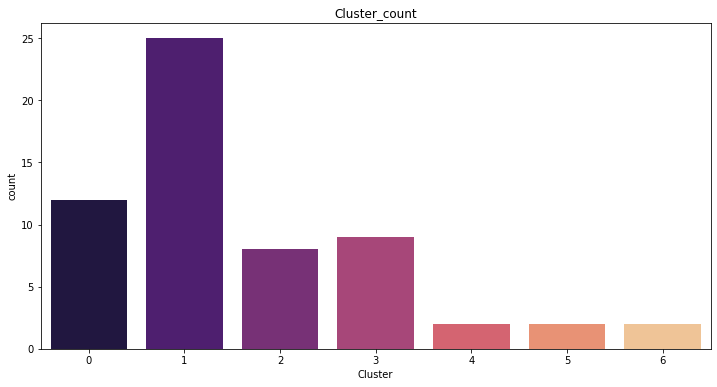

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Cluster', data = final_df, palette = 'magma')
plt.title('Cluster_count')
plt.show()
plt.savefig('cluster_count.png', dpi=300)